In [7]:
import sys
sys.path.append('/home/sol/Escritorio/reservoirs_code/GRN-Reservoirs-master/reservoir_tools/')
import numpy as np
import utils
import reservoirs
import readouts 
import datasets

In [8]:
def reservoir_performance(data_source, adj_matrix, input_weight=None,
                          spectral_radius_scale=0.9, with_bias=True):

    if hasattr(adj_matrix, "todense"):
        adj_matrix = adj_matrix.todense()
    adj_matrix = np.asarray(adj_matrix)

    # Generate dataset
    [x, y] = data_source.func(sample_len=1000)

    weights = adj_matrix * (np.random.random(adj_matrix.shape)*2-1)

    if spectral_radius_scale:
        spectral_radius = utils.get_spectral_radius(weights)
        if spectral_radius == 0:
            raise RuntimeError("Nilpotent adjacency matrix matrix")
        weights *= spectral_radius_scale / spectral_radius

    in_scaling = 0.05
    in_weight = input_weight * in_scaling

    res_dynamics = [reservoirs.simulate_reservoir_dynamics(weights.T, in_weight.T,
                                                i_sig.ravel())
                    for i_sig in x]
    rregr = readouts.RidgeRegression(use_bias=with_bias)
    [rregr.train(x_train, y_train)
     for x_train, y_train in zip(res_dynamics[:-1], y[:-1])]
    pred = rregr(res_dynamics[-1])
    nrmse = utils.nrmse(pred, y[-1])

    if np.isnan(nrmse) or np.isinf(nrmse):
        raise RuntimeError("The NRMSE value obtained is not finite.")

    return nrmse


class _data_source():
    def __init__(self, name, func):
        self.name = name
        self.func = func


data_sources = [_data_source("10th order NARMA", datasets.narma10),
                _data_source("30th order NARMA", datasets.narma30)]

In [9]:
num_trials = 100
spectral_radius = 0.9

In [ ]:
results.append(reservoir_performance(data_sources[1], adj_matrix,
                                        input_weight=inputs_arr,
                                        spectral_radius_scale=spectral_radius))

In [38]:
spectral_radius = 0.9
adj_matrix = np.random.randint(2,size=(1000, 1000))
inputs_arr = np.random.randint(0, 2, (1000, 1))*2 - 1




In [39]:
data_source = data_sources[1]
adj_matrix = adj_matrix
input_weight=inputs_arr
spectral_radius_scale=spectral_radius
with_bias=True
if hasattr(adj_matrix, "todense"):
    adj_matrix = adj_matrix.todense()
adj_matrix = np.asarray(adj_matrix)


In [40]:
# Generate dataset
[x, y] = data_source.func(sample_len=1000)

In [41]:
len(x), len (x[0])

(10, 1000)

In [21]:
import matplotlib.pyplot as plt 

In [ ]:
tyrty

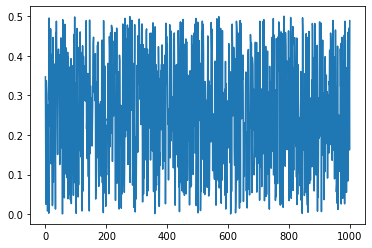

In [22]:
plt.plot(x[0])

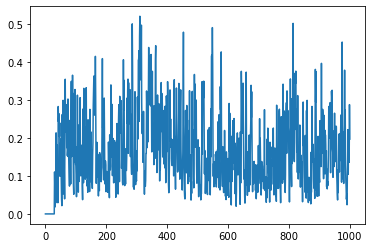

In [23]:
plt.plot(y[0])

In [20]:
len(y), len (y[0])

(10, 1000)

In [42]:
weights = adj_matrix * (np.random.random(adj_matrix.shape)*2-1)

if spectral_radius_scale:
    spectral_radius = utils.get_spectral_radius(weights)
    if spectral_radius == 0:
        raise RuntimeError("Nilpotent adjacency matrix matrix")
    weights *= spectral_radius_scale / spectral_radius

in_scaling = 0.05
in_weight = input_weight * in_scaling

In [43]:
res_dynamics = [reservoirs.simulate_reservoir_dynamics(weights.T, in_weight.T,
                                            i_sig.ravel())
                for i_sig in x]

# res_dinamics es una lista para cada uno de los 10 inputs. Para cada input, res_dyn tiene shape 1000*100 (tsteps * nodes)

In [44]:
len(res_dynamics), res_dynamics[0].shape

(10, (1000, 1000))

In [45]:
len(res_dynamics[:-1])

9

Le da nueve ejemplos y le pide que prediga el 10

In [46]:
rregr = readouts.RidgeRegression(use_bias=with_bias)
[rregr.train(x_train, y_train)
    for x_train, y_train in zip(res_dynamics[:-1], y[:-1])]
pred = rregr(res_dynamics[-1])
nrmse = utils.nrmse(pred, y[-1])


In [48]:
nrmse

0.26466369906333653

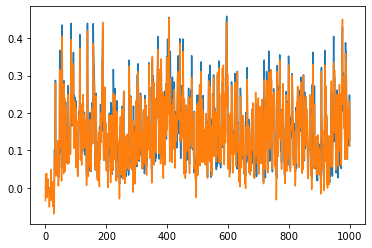

In [47]:
plt.plot(y[-1])
plt.plot(pred)


In [37]:
len(pred), len(y[-1])

(1000, 1000)